In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
df = pd.read_csv("/content/Tesla.csv - Tesla.csv.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)

In [3]:
data = df[["Close"]].values

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [5]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

In [6]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0602
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0043
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0044
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0043
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0041
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0037
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0041
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0033
Epoch 9/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0040
Epoch 10/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0035
Epoch 11/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0032
Epoch 12/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0036
Epoch 13/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0033
Epoch 14/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0031
Epoch 15/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0028
Epoc

In [9]:
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict.reshape(-1,1))
real_prices = scaler.inverse_transform(y.reshape(-1,1))

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


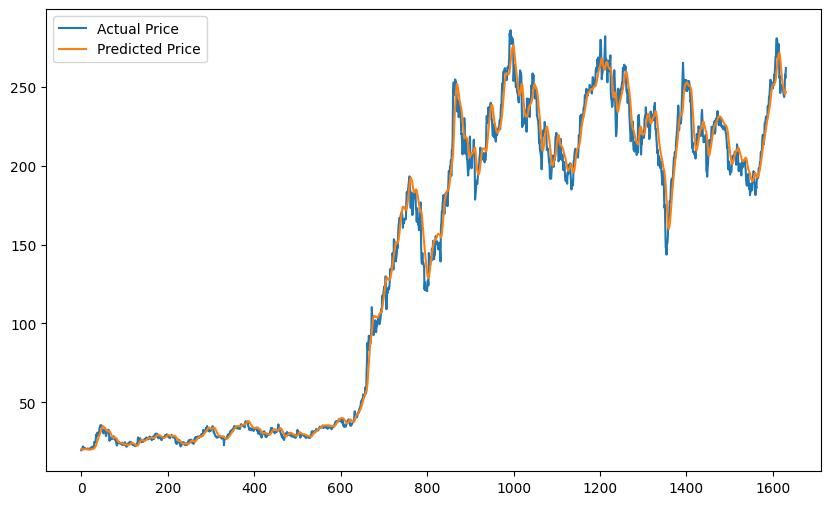

In [10]:
plt.figure(figsize=(10,6))
plt.plot(real_prices, label="Actual Price")
plt.plot(train_predict, label="Predicted Price")
plt.legend()
plt.show()